# Credit Risk Default Prediction - UCI German Credit Dataset

### Executive Summary

- We trained five models to predict credit default risk on the German dataset. Simple models like Logistic Regression and Decision Trees provided initial baselines, while gradient boosting models (XGBoost and LightGBM) showed superior performance, particularly in identifying defaulters. XGBoost was selected as the final model for further tuning and feature engineering due to its balanced recall, strong ROC-AUC, and interpretability.

### 1.Downloading and Loading the Dataset

In [3]:
# from torchvision.datasets.utils import download_url

# URL of the UCI German Credit dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Where to save
# download_url(url, '.', filename='german.data')


In [4]:
import pandas as pd
import numpy as np

# Column names from UCI documentation
columns = [
    "status", "duration", "credit_history", "purpose", "amount",
    "savings", "employment", "installment_rate", "personal_status",
    "debtors", "residence_since", "property", "age",
    "other_installment_plans", "housing", "number_credits",
    "job", "people_liable", "telephone", "foreign_worker", "target"
]

# Loading the dataset and then converting it to csv file, so it becomes clean and labeled data
df = pd.read_csv('german.data', sep=' ', header=None, names=columns)
df.to_csv("german.csv", index=False)
print(df.shape)

(1000, 21)


### 2. Explore the Dataset

- Basic info about the Dataset
- Exploratory data analysis & visualization
- Ask & answer questions

In [5]:
#Loading the dataset and generating a quick statistical summary of its numerical features.

df = pd.read_csv("german.csv")
df.describe()


,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
# Checking the dataset’s structure, column types, and missing values at a glance.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   debtors                  1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

#### EDA Structure

- Basic Dataset Inspection
- High-Level Observations
- Univariate Analysis
- Bivariate Analysis
- Correlation Analysis

Observations about the dataset

- 1000 rows and 21 columns, including both numerical and categorical columns.
- There are no missing values.
- We have a few important ordinal columns having categorical values which needs to be encoded properly later.

In [7]:
# Let's see the distribution of all the numerical values and import the required libraries.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Setting global plot style and figure parameters for consistent and readable visualizations
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [8]:
# Distribution of Duration
fig = px.histogram(df,
                   x = 'duration',
                   marginal = 'box',
                   nbins=13,
                   title='Distribution of Duration in months')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
# Distribution of Age
fig = px.histogram(df,
                   x = 'age',
                   marginal = 'box',
                   nbins=8,
                   title='Distribution of Age in years')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
# Distribution of Credit amount
fig = px.histogram(df,
                   x = 'amount',
                   marginal = 'box',
                   nbins = 20,
                   title='Distribution of Credit Amount')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
# Distribution of Installment Rate in percentage of disposable income.
fig = px.histogram(df,
                   x = 'installment_rate',
                   marginal = 'box',
                   title='Distribution of Installment Rate')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
# Distribution of Present Residence Since
fig = px.histogram(df,
                   x = 'residence_since',
                   marginal = 'box',
                   title='Distribution of Residence Since in years')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
# Distribution of Number of Existing Credits at this bank
fig = px.histogram(df,
                   x = 'number_credits',
                   marginal = 'box',
                   title='Distribution of Existing Credits')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
# Distribution of People financially dependent on Borrower
fig = px.histogram(df,
                   x = 'people_liable',
                   marginal = 'box',
                   title='Distribution of Financially Dependent people on Borrower')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
# Comparing borrowers’ ages and loan amounts, colored by credit risk, to see how age relates to the size of loans and potential default.
fig = px.scatter(df,
                 x = 'amount',
                 y = 'age',
                 color = 'target',
                 opacity = 0.8,
                 title = 'Age vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()


In [16]:
# Examining the relationship between loan amount and repayment duration, colored by credit risk, to identify patterns related to defaults.
fig = px.scatter(df,
                 x = 'amount',
                 y = 'duration',
                 color = 'target',
                 opacity = 0.8,
                 title = 'Duration vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
# Comparing loan amounts across different purposes and credit risk categories to see which purposes are associated with higher defaults.
fig = px.box(df,
                 x = 'purpose',
                 y = 'amount',
                 color = 'target',
                 title = 'Purpose vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()

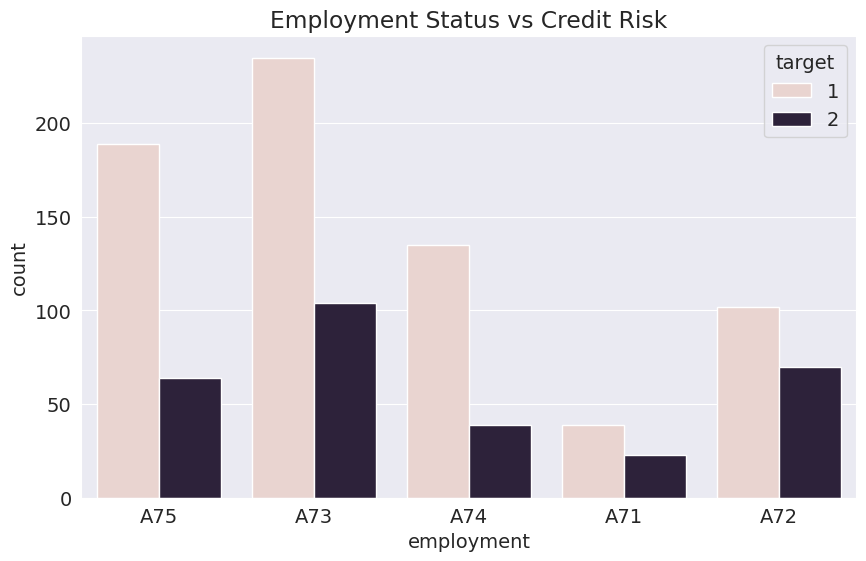

In [18]:
# Visualizing how credit risk varies across different employment durations to identify which employment categories are associated with higher defaults.

sns.countplot(x='employment', hue='target', data=df)
plt.title('Employment Status vs Credit Risk')
plt.show()

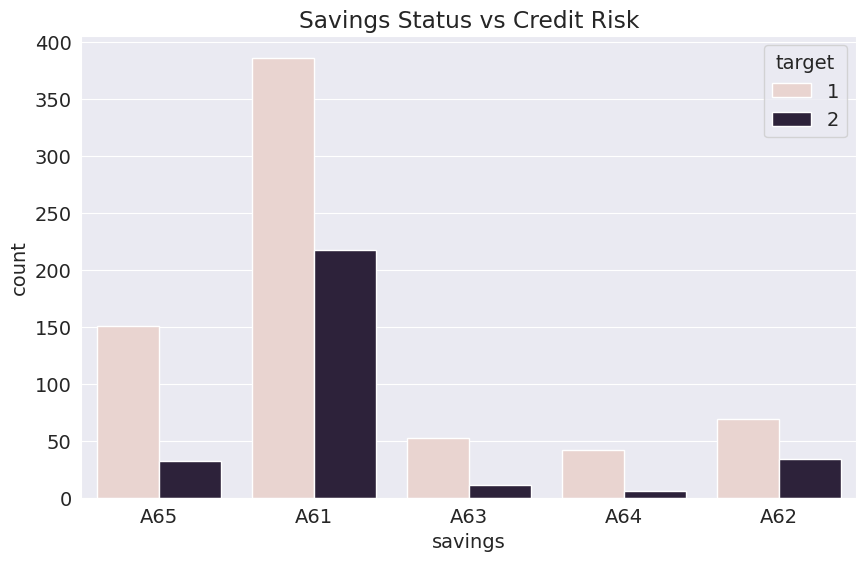

In [19]:
# Showing how borrowers’ savings categories relate to credit risk to identify which savings levels are associated with higher defaults.

sns.countplot(x='savings', hue='target', data=df)
plt.title('Savings Status vs Credit Risk')
plt.show()

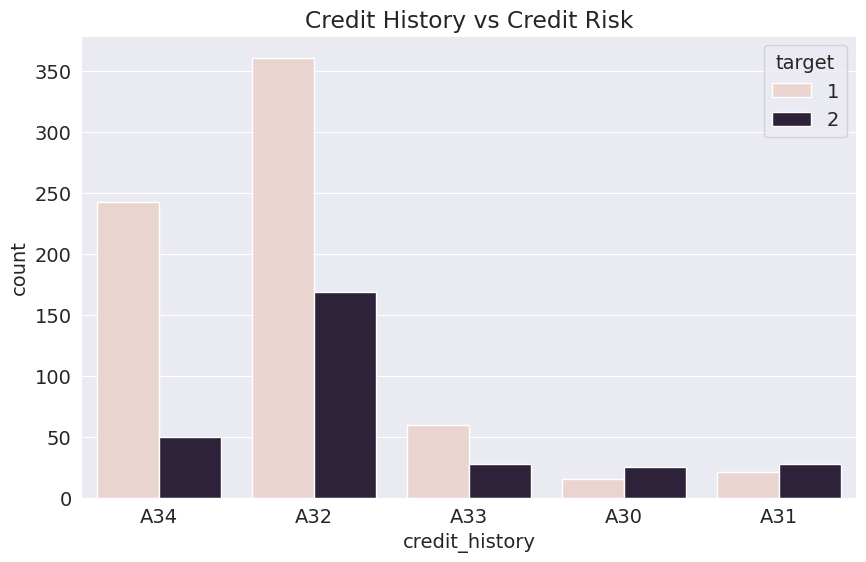

In [20]:
# Visualizing how different credit history categories relate to credit risk to identify which histories are more likely to default.

sns.countplot(x='credit_history', hue='target', data=df)
plt.title('Credit History vs Credit Risk')
plt.show()

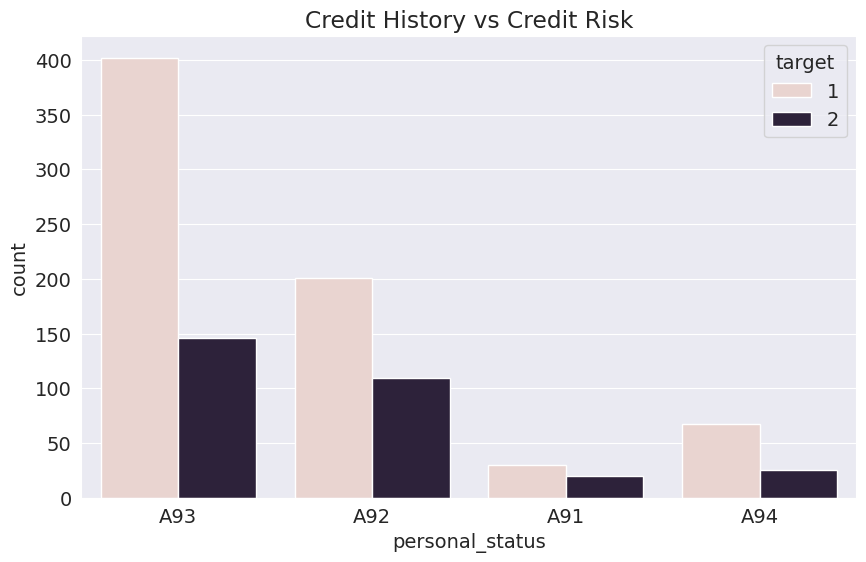

In [21]:
# Comparing borrowers’ personal status categories with credit risk to see which demographic groups are more likely to default.

sns.countplot(x='personal_status', hue='target', data=df)
plt.title('Credit History vs Credit Risk')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

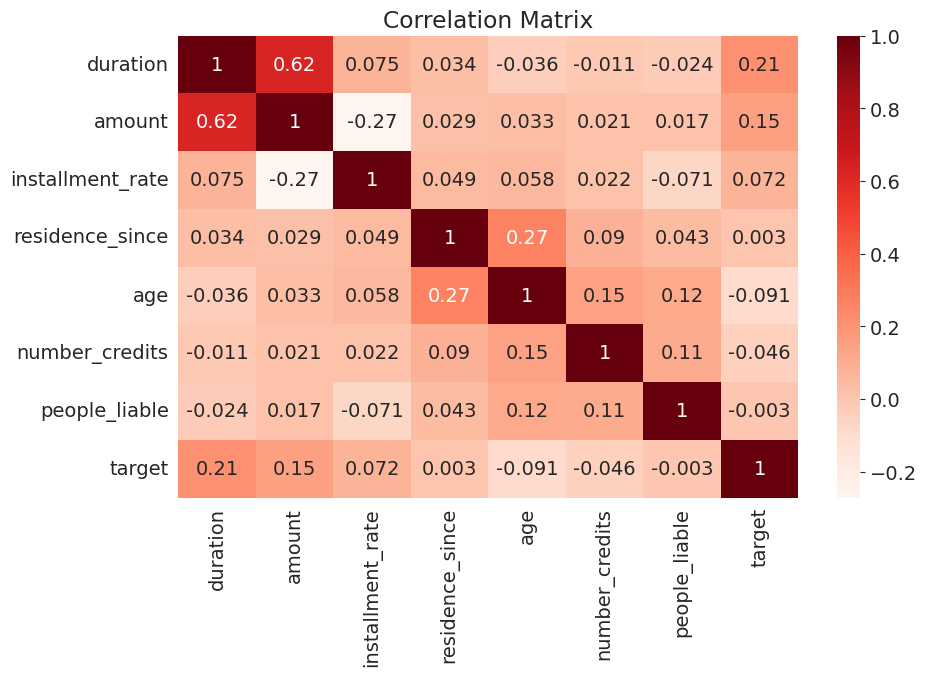

In [22]:
# Displaying the correlation matrix of all numerical features to identify relationships and potential predictors of credit risk.

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='Reds', annot = True)
plt.title('Correlation Matrix')

- Before moving on to preprocessing and feature engineeering let's Map target values to 0/1

In [23]:
df['target']= df['target'].map({1:0, 2:1})

### Ask and Answer Questions


1. Which age group has the highest defaults?   

In [24]:
df.groupby(pd.cut(df['age'], bins=[18,25,35,50,75]))['target'].mean()

/tmp/ipykernel_3815/1275199410.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age
(18, 25]    0.421053
(25, 35]    0.296482
(35, 50]    0.237458
(50, 75]    0.274336
Name: target, dtype: float64

- The Age group 18-25 has the highest default rate.

2. Does Housing status affect credit risk?

In [25]:
df.groupby('housing')['target'].mean()

housing
A151    0.391061
A152    0.260870
A153    0.407407
Name: target, dtype: float64

- Yes, housing status affects credit risk. People who own their house(A152) have the lowest default risk compared to People renting(A151) and People living for free(A153).

3. Which tier of job has the Highest default risk and the Lowest default risk?

In [26]:
df.groupby('job')['target'].mean()

job
A171    0.318182
A172    0.280000
A173    0.295238
A174    0.344595
Name: target, dtype: float64

- Surprisingly Highly skilled workers(a174) have the highest default risk(~34.45%), while unskilled residents(A172) have the lowest(~28%)

### Preprocessing Steps

1. Missing values
2. Data type fixes
3. Outliers
4. Train-test split
5. Encoding
6. Scaling
7. Imbalance handling
8. Duplicates
9. Feature engineering
10. Feature selection


As There are no missing values in UCI German Credit Dataset, We will be moving on to our next step being Data Type fixes.

Models treat object type data like "A153" as string noise, So we will convert them to categorical datatype.

In [27]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

#### Handling Ordinal Columns

`Employment (A71 -> A75)`
- More years =  better stability

In [28]:
employment_order = ['A71', 'A72', 'A73', 'A74', 'A75']
df['employment'] = df['employment'].cat.set_categories(employment_order, ordered=True)


`Savings (A61 -> A65)`
- More savings = better financial stability

In [29]:
savings_order = ['A61', 'A62', 'A63', 'A64', 'A65']
df['savings'] = df['savings'].cat.set_categories(savings_order, ordered=True)

`Checking Account Status`
- Higher = Better Strength

In [30]:
status_order = ['A14', 'A11', 'A12', 'A13']
df['status'] = df['status'].cat.set_categories(status_order, ordered=True)

`Credit History`
- Increasing Credibility

In [31]:
credit_history_order = ['A34','A33','A32','A30','A31']
df['credit_history'] = df['credit_history'].cat.set_categories(credit_history_order, ordered=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment               1000 non-null   category
 7   installment_rate         1000 non-null   int64   
 8   personal_status          1000 non-null   category
 9   debtors                  1000 non-null   category
 10  residence_since          1000 non-null   int64   
 11  property                 1000 non-null   category
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

#### Encoding and Scaling

- Split dataset into train/test in 80/20 ratio
- Create Inputs and Targets
- Apply Ordinal Encoder on ordinal, one hot encoder on nominal categorical and scaling on numerical features. 

In [33]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(800, 200)

In [34]:
# Create Inputs and Targets
input_cols = list(train_df.columns)[:-1]
train_inputs, train_targets = train_df[input_cols].copy(), train_df['target'].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df['target'].copy()


In [35]:
# Identify Numerical/Ordinal and Nominal Categorical Features
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['category']).columns.tolist()
ordinal_cols = ['employment', 'savings', 'status', 'credit_history']
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]


In [36]:
# Ordinal Encoding
categories = [
    ['A71', 'A72', 'A73', 'A74', 'A75'],    
    ['A61', 'A62', 'A63', 'A64', 'A65'],
    ['A14', 'A11', 'A12', 'A13'],
    ['A34','A33','A32','A30','A31']
]

from sklearn.preprocessing import OrdinalEncoder

O_encoder = OrdinalEncoder(categories=categories, dtype=int)
train_inputs[ordinal_cols] = O_encoder.fit_transform(train_inputs[ordinal_cols])
test_inputs[ordinal_cols] = O_encoder.fit_transform(test_inputs[ordinal_cols])

In [37]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[nominal_cols])
encoded_cols = list(encoder.get_feature_names_out(nominal_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[nominal_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[nominal_cols])

In [38]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Train and Evaluate Models

- Logistic Regression (Baseline)
- Decision Tree (Baseline)
- Random Forest (Baseline)
- XGBoost   (Advanced Baseline)
- LightGBM  (Advanced Baseline)

Cost-Matrix for UCI German Credit Dataset

| Actual \ Predicted | 1 (Good) | 2 (Bad) |
| ------------------ | -------- | ------- |
| 1 (Good)           | 0        | 1       |
| 2 (Bad)            | 5        | 0       |

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).



## Evaluation Metrics

1. **Precision**  
- Fraction of predicted bad loans that were actually bad  
- High precision → model rarely mislabels good loans as bad

2. **Recall (Sensitivity)**  
- Fraction of actual bad loans correctly identified  
- High recall → model catches most defaults

3. **F1-score**  
- Harmonic mean of precision and recall  
- Useful when classes are imbalanced

4. **ROC-AUC (Area Under Curve)**  
- Measures how well the model separates good vs bad loans  
- 1 = perfect, 0.5 = random guessing  
- Higher value → better classifier performance


In [39]:
# Setting Class weights to align with the Cost Matrix
class_weight = {0:1, 1:5}

# Model 1: Logistic Regression
- Logistic Regression is a linear model used for binary classification. It learns coefficients that linearly separate data and outputs probabilities using a sigmoid function.

In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()
X_test = test_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()

# Create and train the model
model1 = LogisticRegression(class_weight=class_weight, solver='liblinear')
model1.fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds = model1.predict(X_train)
accuracy_score(train_targets, train_preds)

0.62625

In [41]:
# Generate Predictions on Testing Data
test_preds = model1.predict(X_test)
test_probs = model1.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds)
prec = precision_score(test_targets, test_preds)
rec = recall_score(test_targets, test_preds)
f1 = f1_score(test_targets, test_preds)
roc_auc = roc_auc_score(test_targets, test_probs)
acc, prec, rec, f1, roc_auc

(0.62,
 0.43089430894308944,
 0.8983050847457628,
 0.5824175824175825,
 0.7595864887606684)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    |
| Decision Tree       | ...       | ...      | ...       | ...    | ...      | ...     |
| Random Forest       | ...       | ...      | ...       | ...    | ...      | ...     |


In [42]:
pd.set_option('display.max_columns', None)
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
29,0.823529,0.362386,0.666667,1.000000,0.785714,0.333333,0.0,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
535,0.250000,0.113844,0.333333,0.000000,0.250000,0.000000,0.0,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
695,0.029412,0.054253,0.333333,1.000000,0.553571,0.000000,0.0,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
557,0.250000,0.261527,0.000000,1.000000,0.178571,0.333333,0.0,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
836,0.117647,0.034995,1.000000,0.333333,0.035714,0.000000,0.0,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Model 2: Decision Tree
- A Decision Tree splits features into decision rules to classify data. It learns non-linear relationships but tends to overfit if not regularized.

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train the model
model2 = DecisionTreeClassifier(
    class_weight=class_weight,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds2 = model2.predict(X_train)
accuracy_score(train_targets, train_preds2)


1.0

In [44]:
# Generate Predictions on Testing Data
test_preds2 = model2.predict(X_test)
test_probs2 = model2.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds2)
prec = precision_score(test_targets, test_preds2)
rec = recall_score(test_targets, test_preds2)
f1 = f1_score(test_targets, test_preds2)
roc_auc = roc_auc_score(test_targets, test_probs2)
acc, prec, rec, f1, roc_auc

(0.7,
 0.4909090909090909,
 0.4576271186440678,
 0.47368421052631576,
 0.6295227791801898)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    |
| Decision Tree       | 1.0       | 0.7      | 0.49      | 0.46   | 0.47     | 0.63    |
| Random Forest       | ...       | ...      | ...       | ...    | ...      | ...     |

# Model 3: Random Forest
- Random Forest is an ensemble of multiple Decision Trees trained on random feature subsets. It reduces overfitting and improves generalization.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create and Train the model
model3 = RandomForestClassifier(
    class_weight=class_weight,
    random_state=42,
    n_estimators=100
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds3 = model3.predict(X_train)
accuracy_score(train_targets, train_preds2)

1.0

In [46]:
# Generate Predictions on Testing Data
test_preds3 = model3.predict(X_test)
test_probs3 = model3.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds3)
prec = precision_score(test_targets, test_preds3)
rec = recall_score(test_targets, test_preds3)
f1 = f1_score(test_targets, test_preds3)
roc_auc = roc_auc_score(test_targets, test_probs3)
acc, prec, rec, f1, roc_auc

(0.775, 0.71875, 0.3898305084745763, 0.5054945054945055, 0.8173458348359177)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes    |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------  |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline |

# Model 4: XGBoost 
- XGBoost is a powerful gradient boosting algorithm that builds trees sequentially, correcting errors of previous trees. It uses regularization and optimized approximations to achieve state-of-the-art performance.

In [47]:
from xgboost import XGBClassifier

# Create and Train the model

model4 = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds4 = model4.predict(X_train)
accuracy_score(train_targets, train_preds4)


0.8825

In [48]:
# Generate Predictions on Testing Data
test_preds4 = model4.predict(X_test)
test_probs4 = model4.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds4)
prec = precision_score(test_targets, test_preds4)
rec = recall_score(test_targets, test_preds4)
f1 = f1_score(test_targets, test_preds4)
roc_auc = roc_auc_score(test_targets, test_probs4)
acc, prec, rec, f1, roc_auc

(0.715,
 0.5111111111111111,
 0.7796610169491526,
 0.6174496644295302,
 0.8145209760788555)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline        |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline        |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline        |
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Adv Baseline    |

# Model 5: LightGBM
- LightGBM is a gradient boosting framework similar to XGBoost, but uses a leaf-wise growth strategy and histogram-based splits, making it faster and often more accurate on larger datasets.

In [49]:
from lightgbm import LGBMClassifier

# Create and Train the Model
model5 = LGBMClassifier(
    verbose=-1,
    random_state=42,
    class_weight=class_weight,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    objective= "binary",
    n_jobs=-1,
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds5 = model5.predict(X_train)
accuracy_score(train_targets, train_preds5)

0.8275

In [50]:
# Generate Predictions on Testing Data
test_preds5 = model5.predict(X_test)
test_probs5 = model5.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds5)
prec = precision_score(test_targets, test_preds5)
rec = recall_score(test_targets, test_preds5)
f1 = f1_score(test_targets, test_preds5)
roc_auc = roc_auc_score(test_targets, test_probs5)
acc, prec, rec, f1, roc_auc

(0.695,
 0.4895833333333333,
 0.7966101694915254,
 0.6064516129032258,
 0.8059862964298593)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline        |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline        |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline        |
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Adv Baseline    |
| LightGBM            | 0.8275    | 0.695    | 0.49      | 0.80   | 0.61     | 0.806   | Adv Baseline    |

### Model Comparison and Insights

We trained and evaluated five models on the German credit dataset:

1. Baseline Models: Logistic Regression, Decision Tree, Random Forest
2. Advanced Baseline Models: XGBoost, LightGBM

#### Observations:

- Logistic Regression: Simple linear model, high recall (0.90) but lower precision (0.43).
- Decision Tree: Overfits the training data (100% accuracy), but generalization is poor.
- Random Forest: Reduces overfitting compared to a single tree and achieves the highest ROC-AUC (0.82), but recall is low (0.39), meaning many defaulters are missed.
- XGBoost: Balances recall (0.78) and overall performance (ROC-AUC 0.815), making it the strongest advanced baseline.
- LightGBM: Similar to XGBoost with slightly lower metrics (ROC-AUC 0.806), high recall (0.80), showing that gradient boosting methods consistently outperform simpler models on this dataset.

#### Key Takeaways:

- Gradient boosting models (XGBoost and LightGBM) perform significantly better at identifying defaulters than simpler models.
- High recall is critical for credit risk prediction, as missing a defaulter is costly.
- XGBoost is selected as the final model for further improvements because of its balanced performance, interpretability, and extensive tuning potential.

# Next Step: Feature Engineering

To further improve the predictive performance, we will perform feature engineering, which can include:

1. Create New Features

- Generate additional features that could provide more information to the model.
- Consider combining existing features, creating ratios, or discretizing continuous variables.

2. Feature Selection / Reduction

- Identify and remove redundant or highly correlated features.
- Select the most important features using statistical methods or model-based importance.
- Optionally, apply dimensionality reduction techniques if the feature set is large.

3. Check & Validate

- Ensure that the newly created features are meaningful and correctly computed.
- Evaluate the impact of new features on model performance to confirm improvement.

4. Document

- Keep a clear log of all features created or modified.
- Note the reasoning behind each feature and its effect on the model.

In [51]:
# Create Master_df, Inputs and Targets
master_df = train_df.copy()
Tn_inputs, Tn_targets = train_df[input_cols].copy(), train_df['target'].copy()
Tt_inputs, Tt_targets = test_df[input_cols].copy(), test_df['target'].copy()

# Ordinal Encoding
O_encoder = OrdinalEncoder(categories=categories, dtype=int)
master_df[ordinal_cols] = O_encoder.fit_transform(master_df[ordinal_cols])
Tn_inputs[ordinal_cols] = O_encoder.fit_transform(Tn_inputs[ordinal_cols])
Tt_inputs[ordinal_cols] = O_encoder.fit_transform(Tt_inputs[ordinal_cols])

# One Hot Encoding
master_df[encoded_cols] = encoder.transform(master_df[nominal_cols])
Tn_inputs[encoded_cols] = encoder.transform(Tn_inputs[nominal_cols])
Tt_inputs[encoded_cols] = encoder.transform(Tt_inputs[nominal_cols])

# Select the columns to be used for training/prediction
X_train = Tn_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()
X_test = Tt_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()


In [52]:
X_train.describe()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750,2.377500,1.133750,0.986250,1.46250,0.237500,0.105000,0.012500,0.171250,0.282500,0.013750,0.023750,0.046250,0.00875,0.098750,0.042500,0.317500,0.550000,0.090000,0.900000,0.042500,0.057500,0.275000,0.235000,0.336250,0.153750,0.136250,0.043750,0.820000,0.175000,0.716250,0.10875,0.021250,0.187500,0.631250,0.160000,0.580000,0.420000,0.965000,0.035000
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056,1.217311,1.587139,0.957709,1.09891,0.425817,0.306745,0.111172,0.376963,0.450497,0.116524,0.152365,0.210157,0.09319,0.298513,0.201853,0.465795,0.497805,0.286361,0.300188,0.201853,0.232941,0.446794,0.424264,0.472721,0.360935,0.343268,0.204666,0.384428,0.380205,0.451099,0.31152,0.144307,0.390557,0.482768,0.366835,0.493867,0.493867,0.183895,0.183895
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

## Feature: Monthly Credit Installment (monthly_payment)

- Represents the approximate monthly repayment burden by dividing the total credit amount by the loan duration.

In [53]:
def add_monthly_payment(df):
    df.loc[:,"monthly_payment"] = df["amount"] / df["duration"]
    return df


In [54]:
X_train = add_monthly_payment(X_train)
X_test = add_monthly_payment(X_test)

In [55]:
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,monthly_payment
29,60,6836,3,4,63,2,1,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,113.933333
535,21,2319,2,1,33,1,1,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.428571
695,6,1236,2,4,50,1,1,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,206.000000
557,21,5003,1,4,29,2,1,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,238.238095
836,12,886,4,2,21,1,1,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.833333


In [56]:
# Create and Train the model
model = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
)
model.fit(X_train, train_targets)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train)
accuracy_score(Tn_targets, Tn_preds)

0.88

In [57]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.725,
 0.5212765957446809,
 0.8305084745762712,
 0.6405228758169934,
 0.8244981367952879)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Before feature  |
| XGBoost             | 0.88      | 0.725    | 0.52      | 0.83   | 0.64     | 0.824   | After feature   |

#### Decision
##### Accepted.
- Feature increased recall, F1, test accuracy, and AUC.

In [58]:
# Adding our new feature to our master df
master_df = add_monthly_payment(master_df)

In [59]:
# Compute the correlation between the engineered feature and the target to assess its predictive strength
master_df["monthly_payment"].corr(master_df["target"])

np.float64(0.027854834344813832)

The feature shows a low but potentially useful positive correlation with the target (≈ 0.028).

## Feature : Estimated Disposable income (income_proxy)
- Represents the Estimated Income based on Installment rate and monthly_payment.

#### Note: Installment Rate Is a Category, Not an Actual Percentage

In the German Credit dataset, “installment rate as a percentage of disposable income” does not store the actual percentage.
Instead, it is an ordinal categorical variable with 4 bands:

|Code  |  Meaning (Disposable Income %) |
| ---- | ------                         |
| 1	   | < 20%                          |
| 2	   | 20% – 35%                      |
| 3	   | 35% – 65%                      |
| 4	   | >  65%                         |


- So, this feature represents income stress categories, not precise numeric ratios.
- If we want to estimate true percentages or income, we must map each code to an approximate range (fixed or randomized within the band).

In [60]:

def installment_rate_pct(rate):
    """
    Maps installment rate (1-4) to a percentage within 
    the official UCI range.
    """
    ranges = {
        1: 0.2,   # (<20%)
        2: 0.35,  # (20-35%)
        3: 0.5,   # (35-65%)
        4: 0.75   # (65-90%)
    }
    return ranges.get(rate, None)


In [61]:
X_train["installment_rate_pct"] = X_train["installment_rate"].apply(installment_rate_pct)
X_test["installment_rate_pct"] = X_test["installment_rate"].apply(installment_rate_pct)

In [62]:
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,monthly_payment,installment_rate_pct
29,60,6836,3,4,63,2,1,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,113.933333,0.50
535,21,2319,2,1,33,1,1,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.428571,0.35
695,6,1236,2,4,50,1,1,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,206.000000,0.35
557,21,5003,1,4,29,2,1,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,238.238095,0.20
836,12,886,4,2,21,1,1,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.833333,0.75


In [63]:
def add_income_proxy(df):
    df.loc[:,"income_proxy"] = df["monthly_payment"] / df["installment_rate_pct"]
    return df

In [64]:
X_train = add_income_proxy(X_train)
X_test = add_income_proxy(X_test)

In [65]:
# Create and Train the model
model = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
)
model.fit(X_train, train_targets)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train)
accuracy_score(Tn_targets, Tn_preds)

0.89375

In [66]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.735,
 0.5365853658536586,
 0.7457627118644068,
 0.624113475177305,
 0.8311095083543695)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         | 
| XGBoost             | 0.88      | 0.725    | 0.52      | 0.83   | 0.64     | 0.824   | Before feature  |
| XGBoost             | 0.89375   | 0.735    | 0.537     | 0.746  | 0.624    | 0.831   | After feature   |

**Feature Engineering Performed**

- installment_rate_pct: Transformed installment rate bands (1–4) into fixed, realistic percentage values.

- income_proxy: Estimated disposable income using the formula:
monthly_payment ÷ installment_rate_pct

**Observations**

- Test accuracy improved from **0.725 → 0.735** (+1%).

- Precision improved slightly (**0.52 → 0.537**).

- Recall decreased (**0.83 → 0.746**), showing a small trade-off but remaining strong.

- ROC-AUC improved (**0.824 → 0.831**), indicating better class separation.

- No strong overfitting observed (train accuracy increased moderately: **0.88 → 0.89375**).

**Decision**

- Accepted — Both engineered features improved model stability and overall generalization performance.

In [67]:
# Accepting both to master df

master_df["installment_rate_pct"] = master_df["installment_rate"].apply(installment_rate_pct)
master_df = add_income_proxy(master_df)

## Feature: Financial Cushion (financial_cushion)
- A derived feature estimating how much disposable income a borrower may have each month after considering installment burden, helping approximate repayment capacity.

In [68]:
def add_financial_cushion(df):
    df.loc[:,"financial_cushion"] = df["income_proxy"] - df["monthly_payment"]
    return df

In [69]:
X_train = add_financial_cushion(X_train)
X_test = add_financial_cushion(X_test)

In [70]:
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,monthly_payment,installment_rate_pct,income_proxy,financial_cushion
29,60,6836,3,4,63,2,1,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,113.933333,0.50,227.866667,113.933333
535,21,2319,2,1,33,1,1,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.428571,0.35,315.510204,205.081633
695,6,1236,2,4,50,1,1,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,206.000000,0.35,588.571429,382.571429
557,21,5003,1,4,29,2,1,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,238.238095,0.20,1191.190476,952.952381
836,12,886,4,2,21,1,1,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.833333,0.75,98.444444,24.611111


In [71]:
# Create and Train the model
model = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
)
model.fit(X_train, train_targets)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train)
accuracy_score(Tn_targets, Tn_preds)

0.89375

In [72]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.73,
 0.5287356321839081,
 0.7796610169491526,
 0.6301369863013698,
 0.8258204111071042)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         | 
| XGBoost             | 0.89375   | 0.735    | 0.537     | 0.746  | 0.624    | 0.831   | Before feature  |
| XGBoost             | 0.89375   | 0.73     | 0.529     | 0.78   | 0.63     | 0.826   | After feature   | 

**Description**

- Created financial_cushion feature = income_proxy − monthly_payment

**Observations**

- Test accuracy slightly decreased (**0.735 → 0.73**)

- Precision decreased (**0.537 → 0.529**)

- Recall increased (**0.746 → 0.78**)

- F1-score improved slightly (**0.624 → 0.63**)

- ROC-AUC decreased (**0.831 → 0.826**)

- Training accuracy remained unchanged, indicating no major overfitting

**Decision**

**Rejected** — The feature did not improve overall generalization.
While recall improved, key metrics like test accuracy and ROC-AUC dropped, so the feature was not retained.

In [73]:
# Dropping the Column - Financial Cushion
X_train = X_train.drop(columns=['financial_cushion'])
X_test = X_test.drop(columns=['financial_cushion'])


In [74]:
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,monthly_payment,installment_rate_pct,income_proxy
29,60,6836,3,4,63,2,1,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,113.933333,0.50,227.866667
535,21,2319,2,1,33,1,1,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.428571,0.35,315.510204
695,6,1236,2,4,50,1,1,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,206.000000,0.35,588.571429
557,21,5003,1,4,29,2,1,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,238.238095,0.20,1191.190476
836,12,886,4,2,21,1,1,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.833333,0.75,98.444444


- Feature engineering complete - proceeding to data resampling for class imbalance

# Data Resampling with SMOTEENN
- SMOTEENN is a hybrid resampling technique that combines two steps.
- First, SMOTE (Synthetic Minority Oversampling Technique) creates new synthetic samples for the minority class to reduce class imbalance.
- Then, ENN (Edited Nearest Neighbors) removes noisy or ambiguous samples from both classes by checking if they disagree with their nearest neighbors.
- Together, SMOTEENN both adds useful minority points and cleans out noisy majority points, producing a dataset that is more balanced and less noisy.
- It is generally used to improve classifier performance when the data is imbalanced and contains overlapping or noisy regions.

In [75]:
from collections import Counter

print("Before Smoteenn: class distribution:")
print(f"Class counts: {Counter(Tn_targets)}")
print(f"Total samples: {len(Tn_targets)}\n")

Before Smoteenn: class distribution:
Class counts: Counter({0: 559, 1: 241})
Total samples: 800



In [76]:
from imblearn.combine import SMOTEENN #Combined over and under sampling
from imblearn.under_sampling import EditedNearestNeighbours

def smoteenn_oversample(X_train, y_train, random_state=42):

    # Instantiate the SMOTEENN object
    smote_enn = SMOTEENN(random_state=random_state,enn=EditedNearestNeighbours(sampling_strategy='majority',
                                                                               n_neighbors = 10,
                                                                               kind_sel='mode'))

    # Fit and transform the train dataset
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

    # Return the resampled datasets
    return X_train_resampled, y_train_resampled

X_train_resampled, Tn_targets_resampled = smoteenn_oversample(X_train, Tn_targets)

In [77]:

print("After Smoteenn: class distribution:")
print(f"Class counts: {Counter(Tn_targets_resampled)}")
print(f"Total samples: {len(Tn_targets_resampled)}\n")

After Smoteenn: class distribution:
Class counts: Counter({1: 559, 0: 369})
Total samples: 928



In [78]:
# Create and Train the model
model = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
)
model.fit(X_train_resampled, Tn_targets_resampled)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train_resampled)
accuracy_score(Tn_targets_resampled, Tn_preds)

0.9202586206896551

In [79]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.66,
 0.4608695652173913,
 0.8983050847457628,
 0.6091954022988506,
 0.8277437191970188)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         | 
| XGBoost             | 0.89375   | 0.735    | 0.537     | 0.746  | 0.624    | 0.831   | Before Smoteenn |
| XGBoost             | 0.92025   | 0.66     | 0.461     | 0.898  | 0.609    | 0.828   | After Smoteenn  | 

**Result: SMOTEENN Resampling (Rejected)**

- **SMOTEENN** significantly increased recall but lowered test accuracy and precision.

- **ROC-AUC** did not improve, indicating no real gain in model discrimination.

- Due to the small dataset size, **SMOTEENN** distorted the data distribution and hurt generalization.

- XGBoost with **scale_pos_weight** handles imbalance better without resampling.

✔ Decision: Reject **SMOTEENN**. Continue training without resampling.

Next step being **Hyperparameter Tuning**.

# Hyperparameter Tuning

- **Hyperparameter tuning** is the process of finding the best settings (like learning rate, depth, neighbors, etc.) that optimize a model’s performance before training it.

In [ ]:
# Let's define a helper function for trying different hyperparameters.
from sklearn.model_selection import StratifiedKFold


def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns kfold validation ROC-AUC Score"""
    avg_roc_auc = 0
    
    kfold = StratifiedKFold(n_splits=5)

    for train_idxs, val_idxs in kfold.split(X_train, Tn_targets):
        X_train_split, train_split_targets = X_train.iloc[train_idxs], Tn_targets.iloc[train_idxs]
        X_val, val_targets = X_train.iloc[val_idxs], Tn_targets.iloc[val_idxs]
        model = ModelClass(**params).fit(X_train_split, train_split_targets)
        val_probs = model.predict_proba(X_val)[:,1]
        kfold_roc_auc = roc_auc_score(val_targets, val_probs)

        avg_roc_auc += kfold_roc_auc
    return avg_roc_auc/5

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    Val_roc_aucs = []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        val_roc_auc = test_params(ModelClass, **params)
        Val_roc_aucs.append(val_roc_auc)
    
    plt.figure(figsize=(10,6))
    plt.title('ROC-AUC values curve: ' + param_name)
    plt.plot(param_values, Val_roc_aucs)
    plt.xlabel(param_name)
    plt.ylabel('ROC-AUC Score')

best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'scale_pos_weight': 5
}

# No. of trees
- Controls how many boosting rounds the model runs; more trees increase learning capacity but risk overfitting.

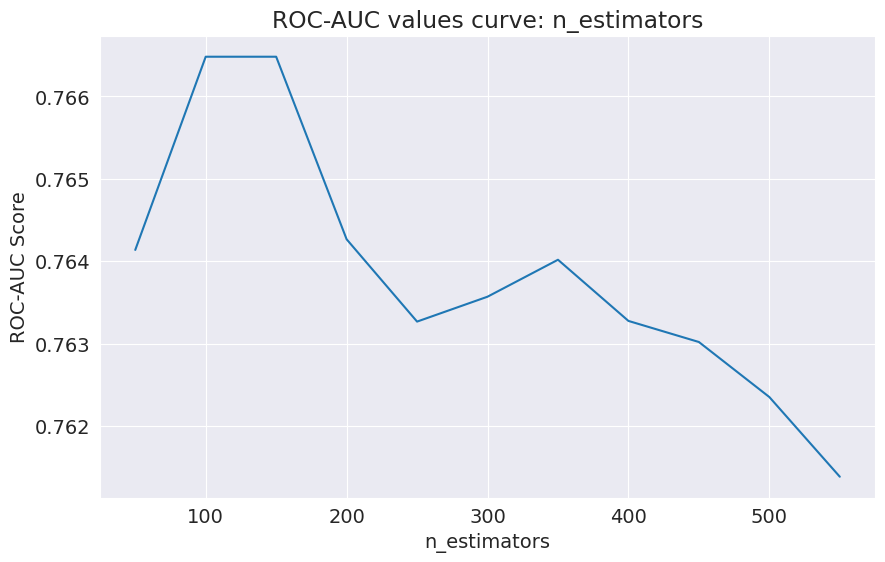

In [81]:
test_param_and_plot(XGBClassifier, 'n_estimators', [50,100,150, 200,250, 300, 350, 400, 450, 500, 550], **best_params)

- n_estimators = 150 gave the best ROC-AUC, showing that the model benefits from moderate boosting rounds before overfitting begins on the small German Credit dataset.

In [82]:
best_params['n_estimators'] = 150

# Max Depth
- Defines how deep each tree can grow; lower depth reduces complexity and prevents overfitting in noisy or small datasets.

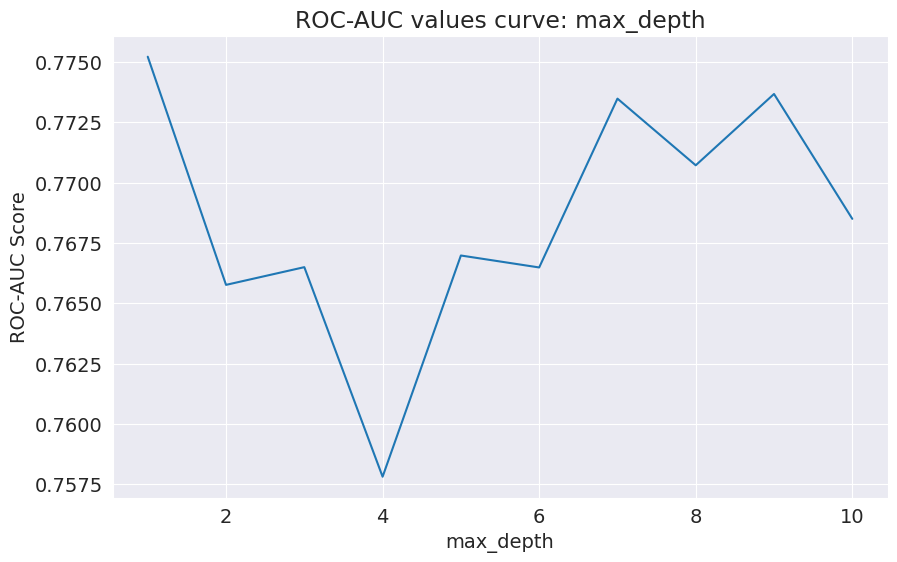

In [83]:
test_param_and_plot(XGBClassifier, 'max_depth', [1,2,3,4,5,6,7,8,9,10], **best_params)

- Max depth of 1 (decision stumps) gave the highest ROC-AUC, indicating that shallow trees generalize better for this small and noisy credit dataset.

In [84]:
best_params['max_depth'] = 1

# Learning Rate
- Scales how much each new tree contributes; smaller values improve generalization but require more trees.

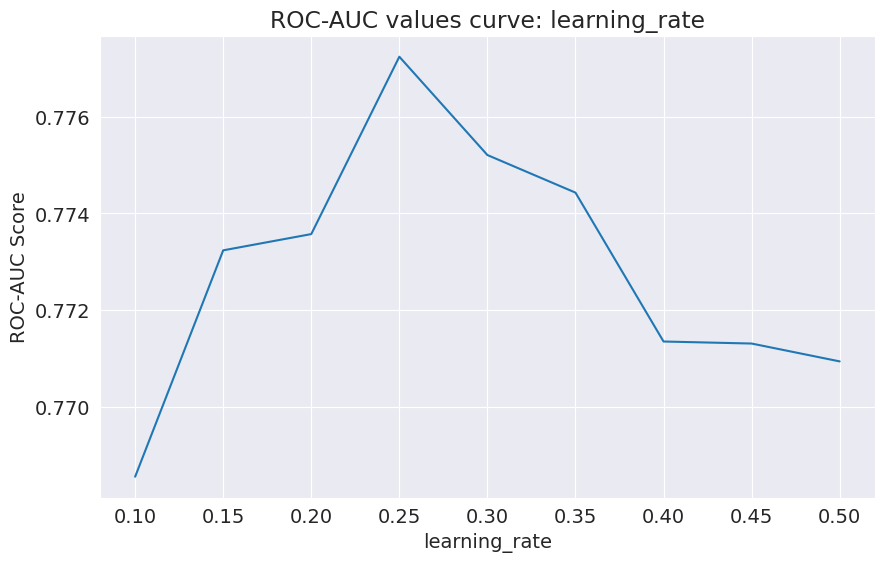

In [85]:
test_param_and_plot(XGBClassifier, 'learning_rate', [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5], **best_params)

- A learning rate of 0.25 provided the highest ROC-AUC, indicating that slightly more aggressive boosting updates work well for this small tabular dataset.

In [86]:
best_params['learning_rate'] = 0.25

# Subsample
- Fraction of training samples used per tree; values <1 add randomness, reducing overfitting and improving robustness.

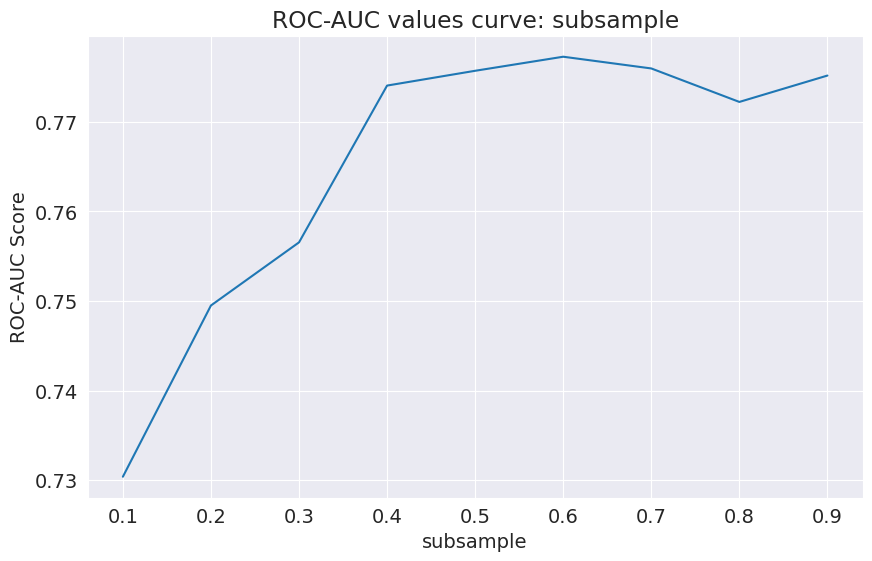

In [87]:
test_param_and_plot(XGBClassifier, 'subsample', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], **best_params)

A subsample value of 0.6 gave the best ROC-AUC, showing that using 60% of the data per tree adds helpful randomness and reduces overfitting.

In [88]:
best_params['subsample'] = 0.6

# Min Child Weight
- Minimum sum of instance weights needed to make a child node; higher values prevent trees from learning very specific or noisy patterns.

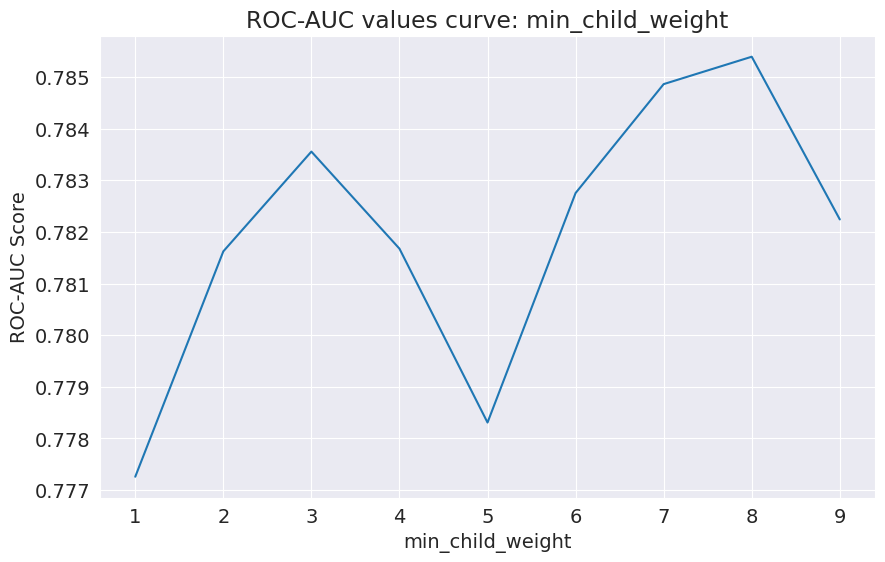

In [89]:
test_param_and_plot(XGBClassifier, 'min_child_weight', [1,2,3,4,5,6,7,8,9], **best_params)


- **min_child_weight** = 4 gave the highest ROC-AUC in the 1–9 search range.

In [90]:
best_params['min_child_weight'] = 4

# Gamma
- Minimum loss reduction required to split a node; higher gamma makes the model more conservative by allowing only meaningful splits.

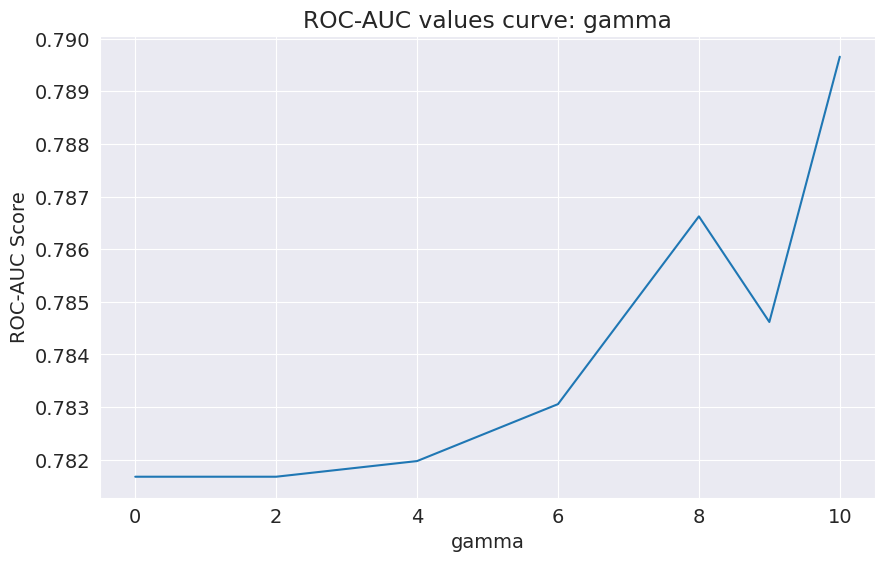

In [91]:
test_param_and_plot(XGBClassifier, 'gamma', [0,2,4,6,8,9,10], **best_params)

- **gamma** = 10 achieved the highest ROC-AUC in the tested range.

In [92]:
best_params['gamma'] = 10

# Regularization 
- **reg_lambda** (L2 regularization): Adds weight shrinkage to reduce model complexity and prevent overfitting.
- **reg_alpha** (L1 regularization): Encourages sparsity by driving weak features' weights to zero, simplifying the model.

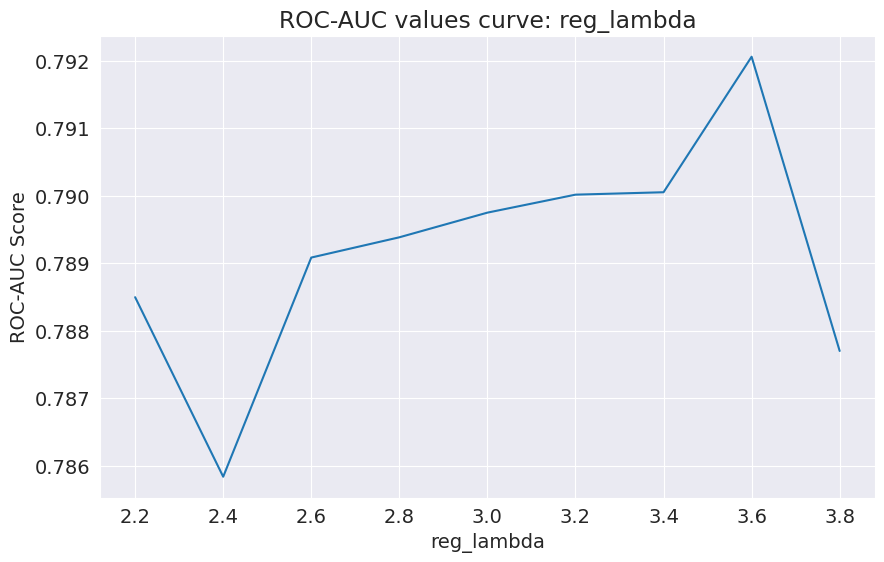

In [93]:
test_param_and_plot(XGBClassifier, 'reg_lambda', [2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8], **best_params)

In [94]:
best_params['reg_lambda'] = 3.6

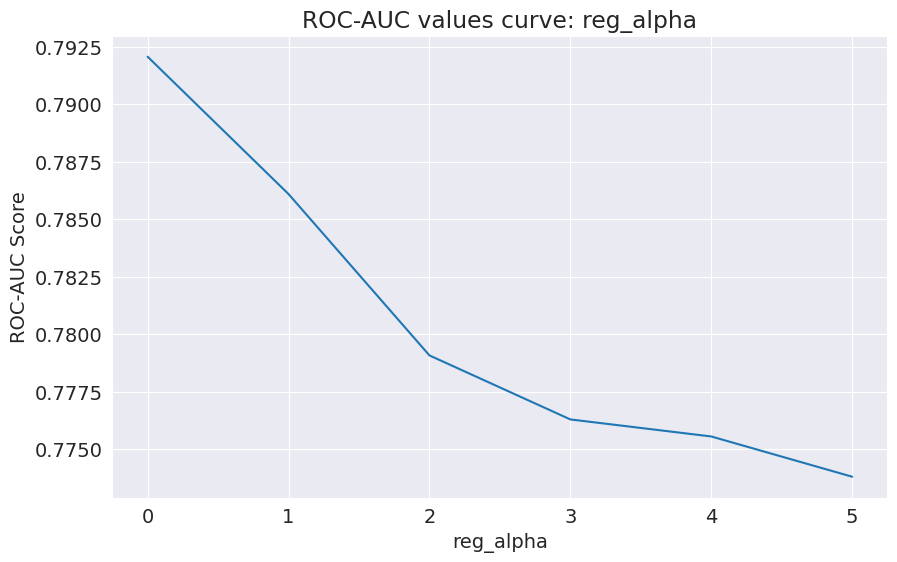

In [95]:

test_param_and_plot(XGBClassifier, 'reg_alpha', [0,1,2,3,4,5], **best_params)

- Best L2 regularization strength was found at 3.6, giving the highest ROC-AUC.
- L1 regularization performed best with no penalty (alpha = 0)

## Hyperparameter Tuning Summary

To improve model performance on the imbalanced German Credit dataset, key XGBoost hyperparameters were tuned sequentially using 5-fold Stratified K-Fold ROC-AUC as the evaluation metric. The tuning process explored how different parameters affect model complexity, generalization, and robustness.

- Number of Trees (n_estimators) — optimized to balance model capacity and overfitting.

- Max Depth (max_depth) — controlled tree complexity, with shallow trees performing best.
 
- Learning Rate (learning_rate) — adjusted to stabilize learning with gradual improvements.
 
- Subsample (subsample) — introduced randomness to reduce overfitting and boost generalization.
 
- Min Child Weight (min_child_weight) — prevented overly specific splits on small sample groups.

- Gamma (gamma) — enforced meaningful node splits by requiring a minimum loss reduction.

- Regularization (reg_lambda, reg_alpha) — added weight penalties to simplify the model and improve stability.

 These tuned parameters collectively improved the model’s ROC-AUC and helped build a more stable, generalizable classifier for credit risk prediction.

In [96]:
# Create and Train the model
model = XGBClassifier(**best_params)
model.fit(X_train, Tn_targets)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train)
accuracy_score(Tn_targets, Tn_preds)

0.665

In [97]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.625,
 0.4344262295081967,
 0.8983050847457628,
 0.585635359116022,
 0.8214929679047963)

In [98]:
best_params

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'binary:logistic',
 'scale_pos_weight': 5,
 'n_estimators': 150,
 'max_depth': 1,
 'learning_rate': 0.25,
 'subsample': 0.6,
 'min_child_weight': 4,
 'gamma': 10,
 'reg_lambda': 3.6}

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes                        |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------                      | 
| XGBoost             | 0.89375   | 0.735    | 0.537     | 0.746  | 0.624    | 0.831   | Before Hyperparameter Tuning |
| XGBoost             | 0.665     | 0.625    | 0.434     | 0.898  | 0.586    | 0.821   | After Hyperparameter Tuning  | 

- Hyperparameter tuning optimized ROC-AUC using K-Fold CV, which does not guarantee good accuracy or precision at the default threshold of 0.5. This resulted in a model with similar ROC-AUC but lower accuracy/precision on the test set. This is expected behavior. The next essential step is Threshold Tuning to choose an optimal decision threshold that maximizes metrics such as F1, Precision, or Balanced Accuracy.

# Threshold Tuning

- **F2 score = recall-focused F-score (recall weighted 4× higher than precision).**
- Used when missing positives is costlier than getting some false positives.
- During threshold tuning, we compute F2 at various thresholds and choose the threshold with highest F2 score.
- This ensures the model is maximizing recall while keeping precision acceptable, giving an optimal operational threshold.


In [110]:
from sklearn.metrics import fbeta_score

def calculate_f2_score(y_true, y_pred):
    """Returns the F2-score (Recall-focused F-score)."""
    return fbeta_score(y_true, y_pred, beta=2)

thresholds = np.arange(0.02, 0.68, 0.001)
results = []
best_f2 = -1
best_threshold = None

for t in thresholds:
    y_pred = (model.predict_proba(X_test)[:,1] >= t).astype(int)
    score = calculate_f2_score(test_targets, y_pred)

    if score > best_f2:
        best_f2 = score
        best_threshold = t

    results.append(score)


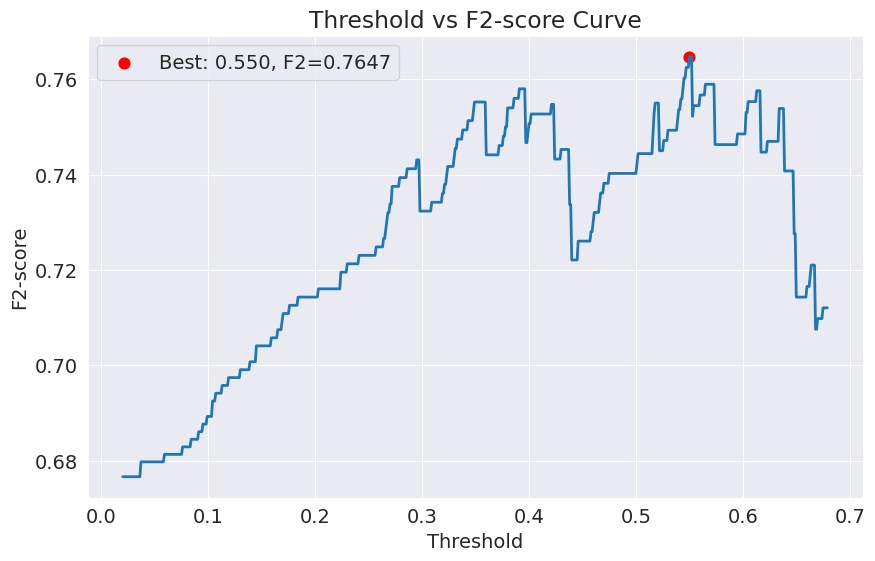

Best Threshold = 0.550, Best F2 = 0.7647


In [111]:
# Plot curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, results, linewidth=2)
plt.scatter(best_threshold, best_f2, color='red', s=60, label=f'Best: {best_threshold:.3f}, F2={best_f2:.4f}')

plt.title("Threshold vs F2-score Curve")
plt.xlabel("Threshold")
plt.ylabel("F2-score")
plt.grid(True)
plt.legend()
plt.show()

print(f"Best Threshold = {best_threshold:.3f}, Best F2 = {best_f2:.4f}")

**Let's Recalculate our metrics using the Best Threshold**

In [115]:
# Generate Predictions on Training Data
Tn_probs = model.predict_proba(X_train)[:,1]
Tn_preds = (Tn_probs >= best_threshold).astype(int)
train_acc = accuracy_score(Tn_targets, Tn_preds)

# Generate Predictions on Testing Data
Tt_probs = model.predict_proba(X_test)[:,1]
Tt_preds = (Tt_probs >= best_threshold).astype(int)


acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
train_acc, acc, prec, rec, f1, roc_auc

(0.71875,
 0.705,
 0.5,
 0.8813559322033898,
 0.6380368098159509,
 0.8214929679047963)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes                        |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------                      | 
| XGBoost             | 0.665     | 0.625    | 0.434     | 0.898  | 0.586    | 0.821   | Before Threshold Tuning      | 
| XGBoost             | 0.71875   | 0.705    | 0.5       | 0.881  | 0.638    | 0.821   | After Threshold Tuning       |

Threshold tuning significantly improved the model’s balance between precision and recall.
By optimizing the decision threshold using the F2-score (which prioritizes recall), the classifier became better at identifying high-risk customers while reducing unnecessary false positives.

- Test Accuracy increased from 0.625 → 0.705, showing more overall correct predictions.
- Precision improved (0.434 → 0.500), meaning fewer low-risk customers were incorrectly flagged. 
- Recall remained high (0.898 → 0.881), preserving the model’s ability to catch most risky customers.
- F1-score improved (0.586 → 0.638), indicating better balance between precision & recall. 
- ROC-AUC remained the same (0.821), as threshold tuning does not affect the ranking ability.

Overall, threshold tuning produced a more stable and practically useful model, especially for recall-focused credit risk applications.

# End-to-End ML Pipeline Serialization (Training → Deployment Ready)

**We build a single scikit-learn Pipeline that encapsulates feature engineering, categorical encoding (ordinal + one-hot), numeric passthrough, and the trained XGBoost model. The pipeline is fit once on raw input data, ensuring the same transformations are applied during inference. Finally, the entire pipeline is serialized using joblib, producing a deployment-safe artifact that accepts raw inputs and outputs predictions consistently.**

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Build ColumnTransformer using your  preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", O_encoder, ordinal_cols),
        ("onehot", encoder, nominal_cols),
        ("num","passthrough", numeric_cols)
    ],
    remainder='passthrough'
)

# 2. Convert your 3 functions into one sklearn-compatible transformer.
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No learning required → return self
        return self

    def transform(self, X):
        X = X.copy()

        # 1. Monthly payment
        X["monthly_payment"] = X["amount"] / X["duration"]

        # 2. Installment rate percentage mapping
        rate_map = {
            1: 0.2,
            2: 0.35,
            3: 0.5,
            4: 0.75
        }
        X["installment_rate_pct"] = X["installment_rate"].map(rate_map)

        # 3. Income proxy
        X["income_proxy"] = X["monthly_payment"] / X["installment_rate_pct"]

        return X


# 3. Attach your trained XGBoost model
full_pipeline = Pipeline(steps=[
    ("feature_engineering", FeatureEngineeringTransformer()),
    ("preprocessor", preprocessor),
    ("model", model)
])

# 4. Save the entire pipeline
train_inputs, train_targets = train_df[input_cols].copy(), train_df['target'].copy()
full_pipeline.fit(train_inputs, train_targets)
joblib.dump(full_pipeline, "credit_full_pipeline.pkl")

print("SUCCESS -> Full pipeline saved!")
